In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the CSV file of the required dataset in my jupyter notebook.
wine=pd.read_csv('RedWineQuality.csv')
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
# Checking number of rows and columns in our dataset
wine.shape

(1599, 12)

In [4]:
# Let's check if there are any missing values
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Data Analysis and Visualization

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# checking the summary statistics 
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
# let's calculate skewness for each column
# Our acceptable range for skewness is between -0.5 and 0.5
wine.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

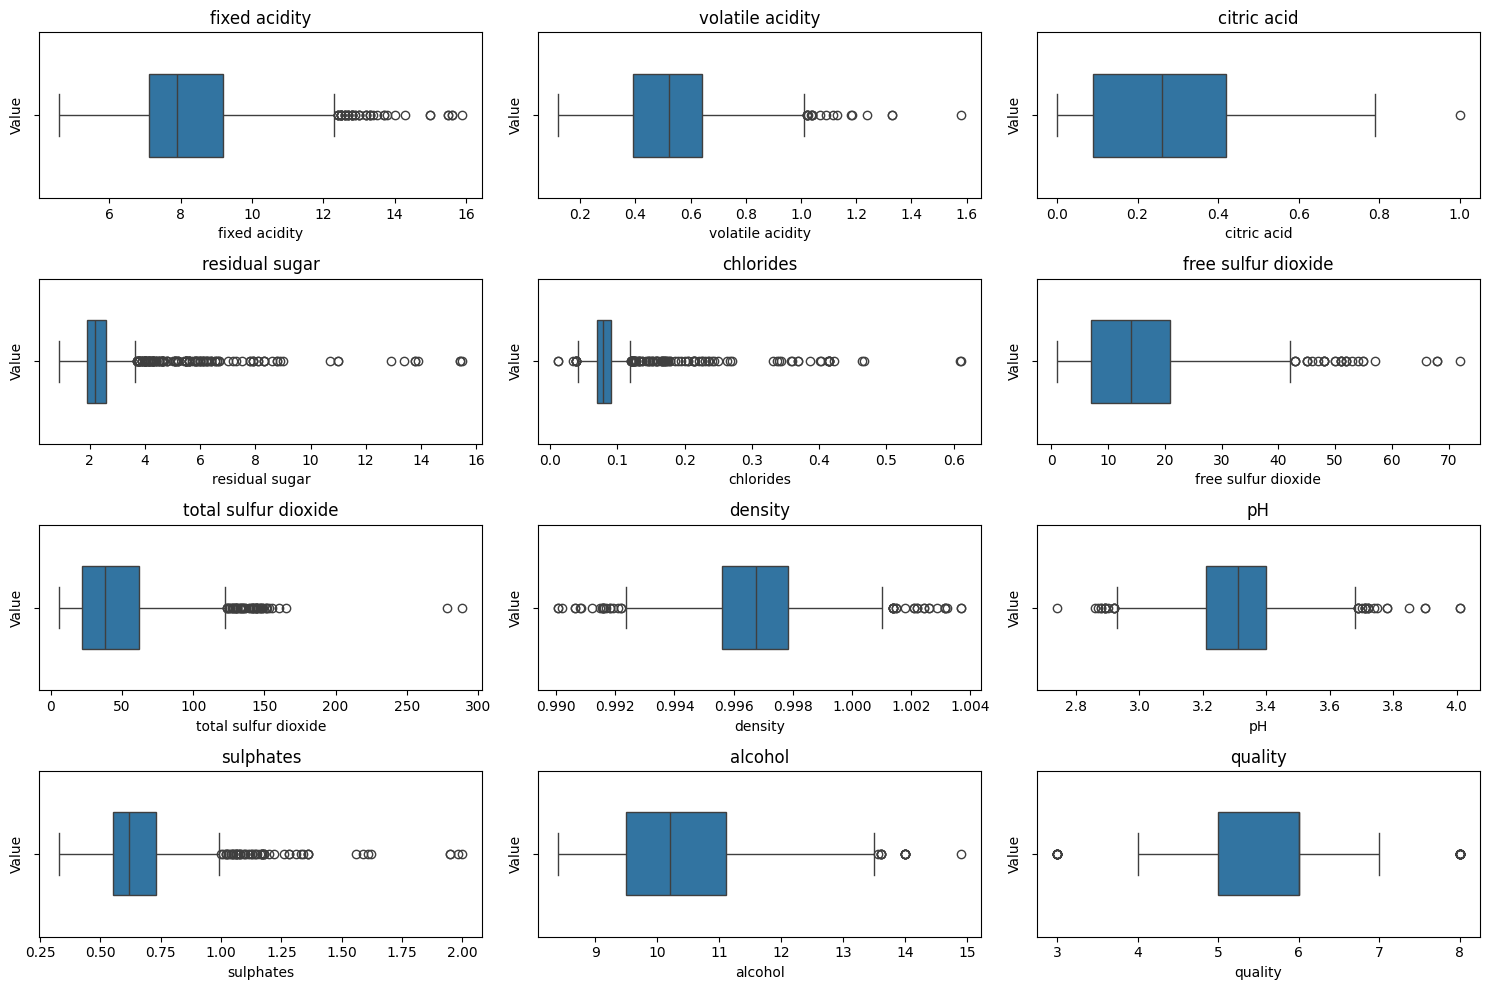

In [8]:
# creating boxplots to check the presence of outliers
plt.figure(figsize=(15, 10))

for i, column in enumerate(wine.columns):
    plt.subplot(4,3, i + 1) 
    sns.boxplot(x=wine[column], orient="v", width=0.5)
    plt.title(column)
    plt.ylabel("Value")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

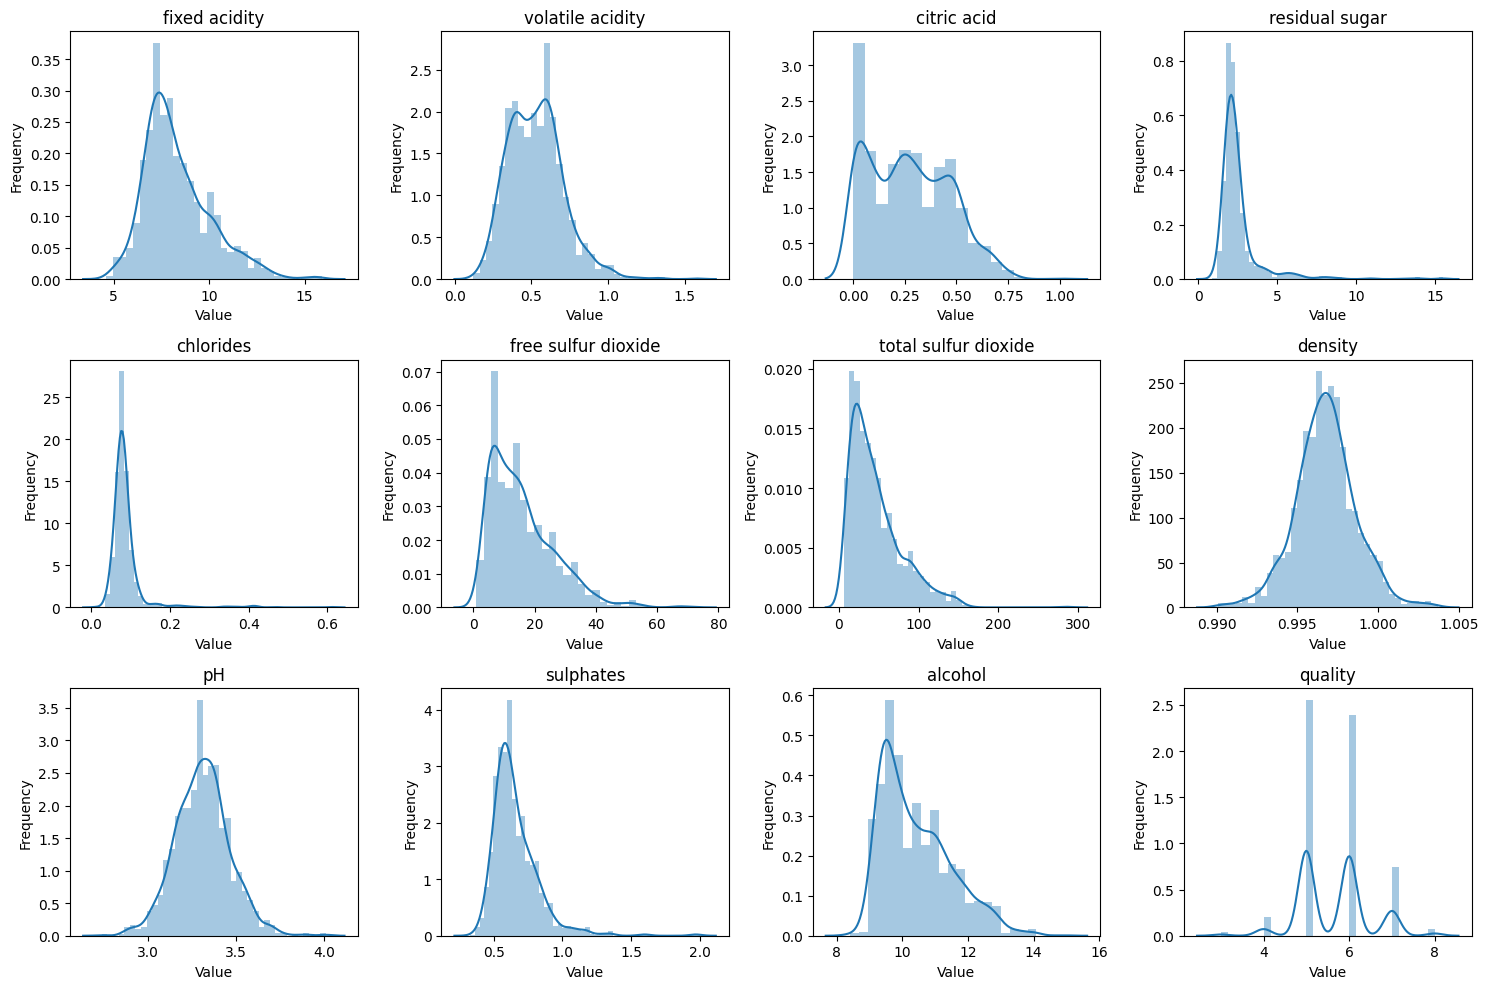

In [9]:
# checking distribution for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(wine.columns):
    plt.subplot(3, 4, i + 1)  
    sns.distplot(wine[column], kde=True)  
    plt.title(column)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

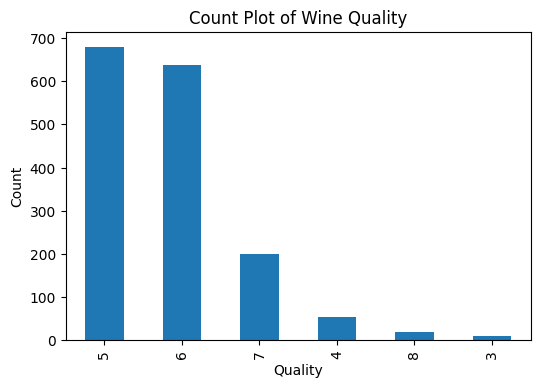

In [10]:
# Calculating value counts for 'quality' column
quality_counts = wine['quality'].value_counts()

# Creating bar plot
quality_counts.plot(kind='bar', figsize=(6, 4))
plt.title('Count Plot of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

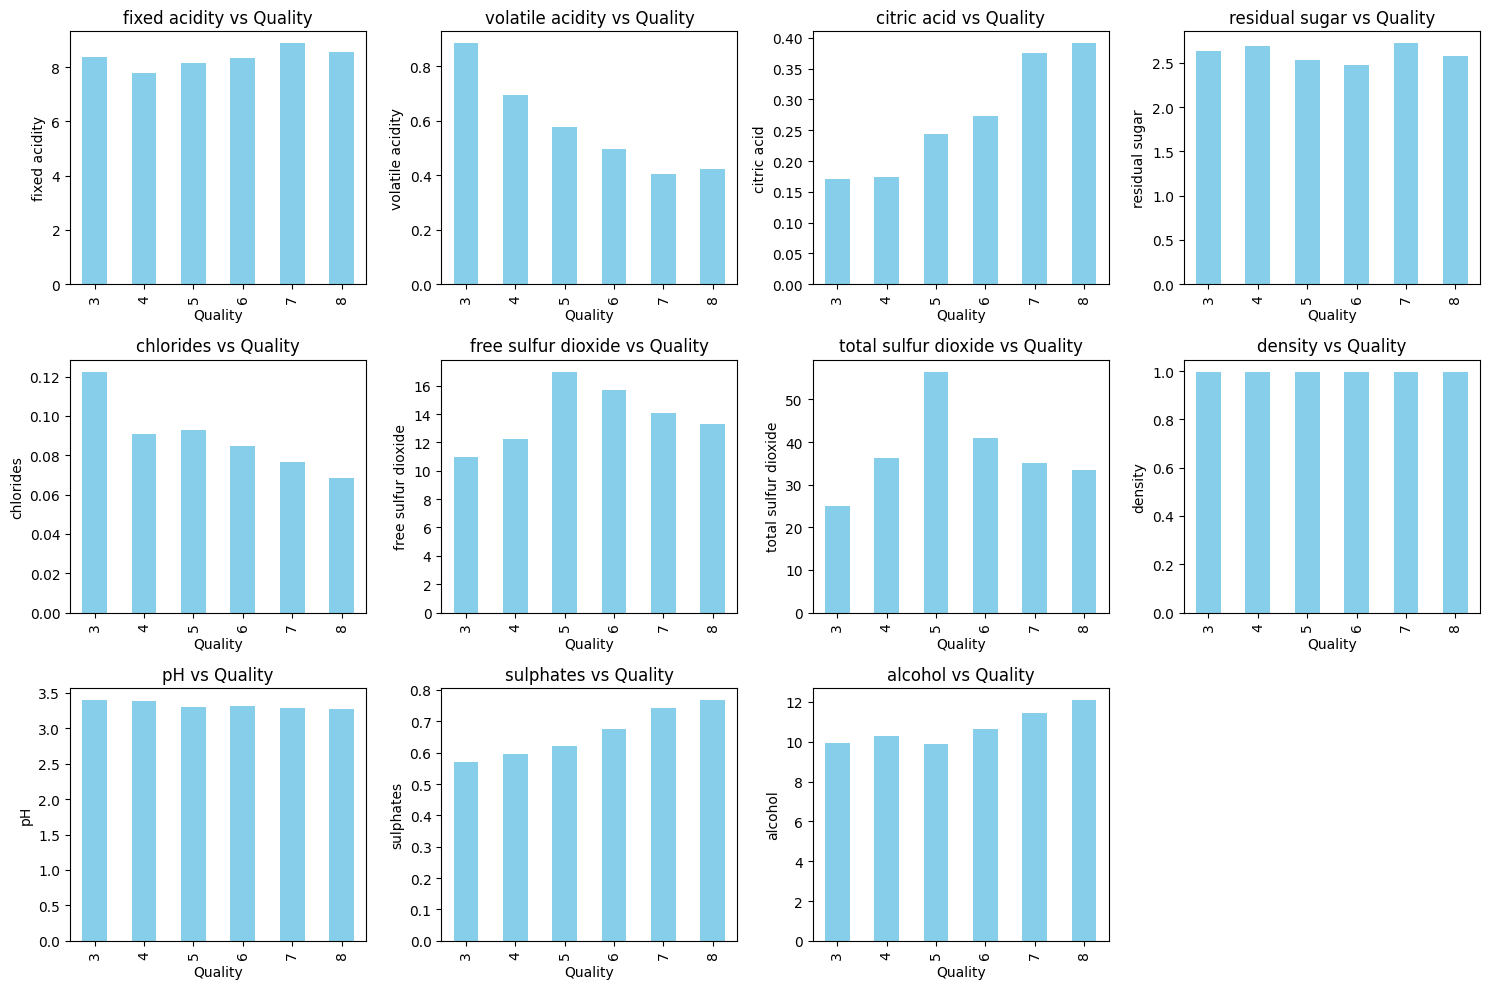

In [11]:
# Defining the list of features (excluding the quality column)
features = wine.columns.drop('quality')

# Setting the size of the plot
plt.figure(figsize=(15, 10))

# Looping through each feature and creating a bar plot
for i, feature in enumerate(features):
    plt.subplot(3, 4, i + 1)
    wine.groupby('quality')[feature].mean().plot(kind='bar', color='skyblue')
    plt.title(f"{feature} vs Quality")
    plt.xlabel("Quality")
    plt.ylabel(feature)

# Adjusting layout and display the plot
plt.tight_layout()
plt.show()

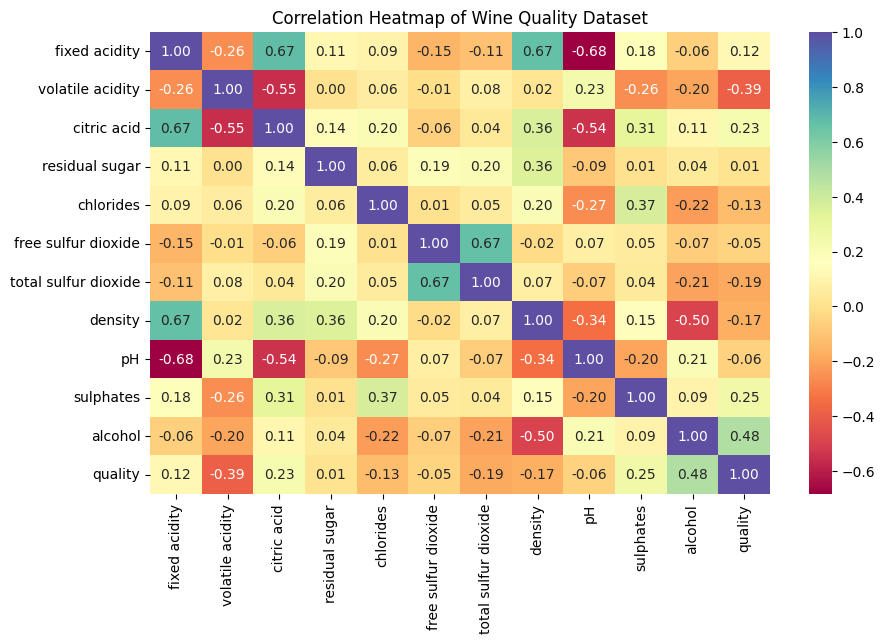

In [12]:
# Calculating the correlation using heatmap
corr_matrix = wine.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr_matrix, annot=True, cmap='Spectral', fmt=".2f", annot_kws={"size": 10})

plt.title("Correlation Heatmap of Wine Quality Dataset")

plt.show()

In [13]:
wine.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
892,10.1,0.450,0.23,1.9,0.082,10.0,18.0,0.99774,3.22,0.65,9.3,6
341,10.6,0.420,0.48,2.7,0.065,5.0,18.0,0.99720,3.21,0.87,11.3,6
1360,9.2,0.540,0.31,2.3,0.112,11.0,38.0,0.99699,3.24,0.56,10.9,5
905,9.2,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5
1017,8.0,0.180,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7,6
373,7.4,0.550,0.22,2.2,0.106,12.0,72.0,0.99590,3.05,0.63,9.2,5
157,7.1,0.430,0.42,5.5,0.071,28.0,128.0,0.99730,3.42,0.71,10.5,5
534,10.0,0.480,0.24,2.7,0.102,13.0,32.0,1.00000,3.28,0.56,10.0,6
1410,6.6,0.960,0.00,1.8,0.082,5.0,16.0,0.99360,3.50,0.44,11.9,6
537,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.99720,3.37,0.77,10.7,6


### Outlier Removal

In [14]:
# Defining a function to remove outliers using z-score
def remove_outliers_zscore(df, threshold=3):
    # Calculating z-scores for each column
    z_scores = np.abs((wine - wine.mean()) / wine.std())
    # Removing rows where any z-score is greater than the threshold
    wine_cleaned = wine[(z_scores < threshold).all(axis=1)]
    return wine_cleaned

# Specifying columns to remove outliers from (excluding categorical or target columns)
columns_to_check = wine.select_dtypes(include=np.number).columns

# Remove outliers from selected columns
wine_cleaned = remove_outliers_zscore(wine[columns_to_check])

# Display the shape of the original and cleaned datasets
print("Original dataset shape:", wine.shape)
print("Cleaned dataset shape:", wine_cleaned.shape)

Original dataset shape: (1599, 12)
Cleaned dataset shape: (1451, 12)


### Spliting the dataset into feature variables (X) and target variable (y)

In [15]:
x = wine_cleaned.drop("quality", axis=1)  # Droping the target column to get the features
y = wine_cleaned["quality"]  # Assigning the target column to y

print("Shape of X:", x.shape)
print("Shape of y:", y.shape)

Shape of X: (1451, 11)
Shape of y: (1451,)


### Treating Class Imbalance

In [16]:
y.value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [17]:
from imblearn.over_sampling import RandomOverSampler

# Displaying the class distribution before oversampling
print("Class distribution before oversampling:")
print(y.value_counts())

# Oversample the minority classes
oversampler = RandomOverSampler()
X,Yy = oversampler.fit_resample(x, y)

# Display the class distribution after oversampling
print("\nClass distribution after oversampling:")
print(Yy.value_counts())

Class distribution before oversampling:
5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

Class distribution after oversampling:
5    617
6    617
7    617
4    617
8    617
Name: quality, dtype: int64


In [18]:
X.shape 

(3085, 11)

### Label Binarazation

In [19]:
from sklearn.preprocessing import LabelBinarizer

# Convert values >= 7 to 1 and values < 7 to 0
Y = (Yy >= 7).astype(int)

# Displaying the original and binarized target variable
print("Original target variable (quality):")
print(Yy.head())

print("\nBinarized target variable:")
print(Y.head())

Original target variable (quality):
0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

Binarized target variable:
0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32


In [20]:
Y.sample(10)

2513    1
962     0
2098    1
1289    0
607     0
2478    1
2160    1
1615    0
2250    1
2106    1
Name: quality, dtype: int32

In [21]:
Y.shape

(3085,)

### Feature Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
# intializing minmax scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [24]:
print(X)

[[0.28235294 0.63043478 0.         ... 0.72413793 0.27710843 0.17647059]
 [0.32941176 0.82608696 0.         ... 0.36781609 0.42168675 0.25490196]
 [0.32941176 0.69565217 0.05063291 ... 0.43678161 0.38554217 0.25490196]
 ...
 [0.67058824 0.25       0.67088608 ... 0.31034483 0.38554217 0.49019608]
 [0.25882353 0.2826087  0.39240506 ... 0.40229885 0.51807229 0.54901961]
 [0.42352941 0.32608696 0.49367089 ... 0.54022989 0.43373494 0.62745098]]


In [25]:
X.shape

(3085, 11)

### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# Spliting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Displaying the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", Y_test.shape)

Shape of X_train: (2468, 11)
Shape of y_train: (2468,)
Shape of X_test: (617, 11)
Shape of y_test: (617,)


### Model Evaluation and Performance Metrics

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report

class ModelEvaluator:
    def __init__(self, model):
        self.model = model

    def evaluate(self, X, Y):
        # Split the data into training and testing sets
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        
        # Training the model
        self.model.fit(X_train, Y_train)
        
        # Predicting y_test
        y_pred = self.model.predict(X_test)
        
        # Accuracy Score
        acc_score = accuracy_score(Y_test, y_pred) * 100
        print("Accuracy Score:", acc_score)
        
        # Classification Report
        class_report = classification_report(Y_test, y_pred)
        print("\nClassification Report:\n", class_report)
        
        # Cross Validation Score
        cv_score = cross_val_score(self.model, X, Y, cv=5).mean() * 100
        print("Cross Validation Score:", cv_score)
        
        # Result of accuracy minus cv scores
        result = acc_score - cv_score
        print("\nAccuracy Score - Cross Validation Score is", result)


### Creating Machine Learning Model

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [30]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [31]:
# Evaluate models
for name, model in models.items():
    print("\n\nModel:", name)
    evaluator = ModelEvaluator(model)
    evaluator.evaluate(X, Y)



Model: Decision Tree
Accuracy Score: 97.08265802269044

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       372
           1       0.93      1.00      0.96       245

    accuracy                           0.97       617
   macro avg       0.97      0.98      0.97       617
weighted avg       0.97      0.97      0.97       617

Cross Validation Score: 94.78119935170177

Accuracy Score - Cross Validation Score is 2.3014586709886657


Model: Random Forest
Accuracy Score: 98.54132901134521

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       372
           1       0.97      0.99      0.98       245

    accuracy                           0.99       617
   macro avg       0.98      0.99      0.98       617
weighted avg       0.99      0.99      0.99       617

Cross Validation Score: 96.07779578606159

Accuracy Score - Cross Validation 

### Hyper parameter tuning on the Random Forest 

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Defining the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 150],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]            # Minimum number of samples required to be at a leaf node
}

# Performing Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X, Y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best ROC-AUC Score:", best_score)


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best ROC-AUC Score: 0.9968232807373457


In [33]:
# Defining the final Random Forest classifier with the best parameters
final_rf_classifier = RandomForestClassifier(
    n_estimators=150,
    max_depth=20,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Training the final model on the entire dataset
final_rf_classifier.fit(X, Y)

RandomForestClassifier(max_depth=20, n_estimators=150, random_state=42)

### AUC ROC Curve

In [34]:
from sklearn.metrics import roc_curve, auc

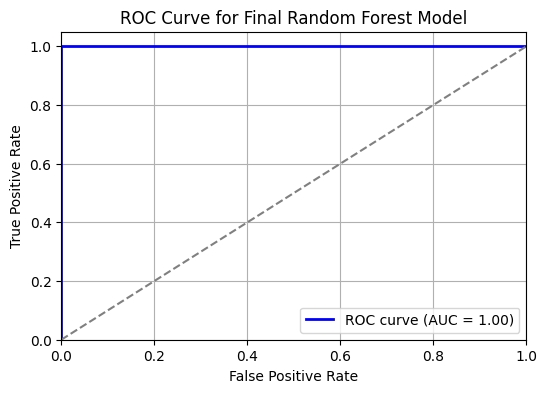

In [35]:
# Predicting probabilities for the positive class (class 1)
y_probs = final_rf_classifier.predict_proba(X)[:, 1]

# Computing ROC curve and AUC
fpr, tpr, _ = roc_curve(Y, y_probs)
roc_auc = auc(fpr, tpr)

# Ploting ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Final Random Forest Model')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

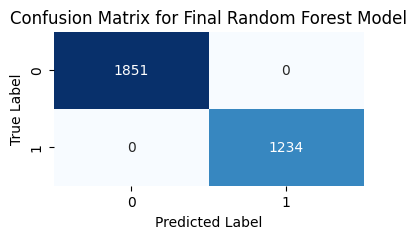

In [37]:
# Predicting classes
y_pred = final_rf_classifier.predict(X)

# Generating confusion matrix
conf_matrix = confusion_matrix(Y, y_pred)

# Ploting confusion matrix
plt.figure(figsize=(4, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Final Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [38]:
conf_matrix = confusion_matrix(Y, y_pred)
conf_matrix

array([[1851,    0],
       [   0, 1234]], dtype=int64)

### Saving the Model

In [39]:
import joblib

In [40]:
# Saving the final model to a file
joblib.dump(final_rf_classifier, 'final_random_forest_model.pkl')

['final_random_forest_model.pkl']